<a href="https://colab.research.google.com/github/ankitasharma88990/Image-to-text/blob/master/Traffic_Signal_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import pandas.util.testing as tm
import seaborn as sns
import pickle 
import random

In [0]:
training_data = open('train.p','rb')
train = pickle.load(training_data)
training_data.close()

In [0]:
testing_data = open('test.p','rb')
test = pickle.load(testing_data)
testing_data.close()

In [0]:
validating_data = open('valid.p','rb')
valid = pickle.load(validating_data)
validating_data.close()

In [0]:
X_train, y_train= train['features'],  train['labels']
X_validation, y_validation= valid['features'],  valid['labels']
X_test, y_test= test['features'],  test['labels']

In [125]:
X_train.shape

(34799, 32, 32, 3)

In [126]:
y_train.shape

(34799,)

31

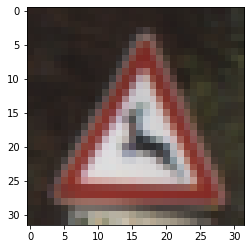

In [127]:
i=np.random.randint(1,len(X_train))
plt.imshow(X_train[i])
y_train[i]

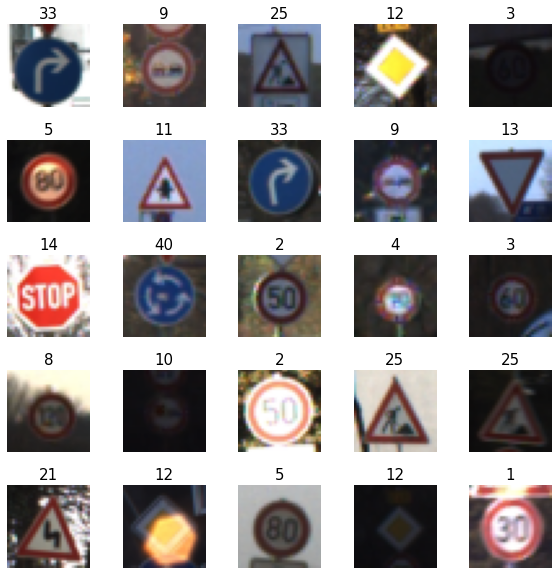

In [128]:
w_grid=5
l_grid=5

fig,axes=plt.subplots(l_grid,w_grid,figsize=(10,10))
axes=axes.ravel()
n_training=len(X_train)

for i in np.arange(0,w_grid*l_grid):
  index=np.random.randint(0,n_training)

  axes[i].imshow(X_train[index])
  axes[i].set_title(y_train[index],fontsize=15)
  axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [0]:
from sklearn.utils import shuffle
X_train,y_train=shuffle(X_train,y_train)

In [132]:
X_train_gray=np.sum(X_train/3,axis=3,keepdims=True)
X_test_gray=np.sum(X_test/3,axis=3,keepdims=True)
X_validation_gray=np.sum(X_validation/3,axis=3,keepdims=True)
X_train_gray.shape
X_test_gray.shape
X_validation_gray.shape

(4410, 32, 32, 1)

In [0]:
X_train_gray_norm=(X_train_gray-128)/128
X_test_gray_norm=(X_test_gray-128)/128
X_validation_gray_norm=(X_validation_gray-128)/128

In [0]:
X_train_gray_norm

In [0]:
X_test_gray_norm

In [0]:
X_validation_gray_norm

In [0]:
i=random.randint(1,len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(),cmap='gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(),cmap='gray')

In [0]:
from tensorflow.keras import datasets,layers,models

In [142]:

CNN = models.Sequential()

CNN.add(layers.Conv2D(6,(5,5),activation='relu',input_shape=(32,32,1)))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(16,(5,5),activation='relu'))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Flatten())

CNN.add(layers.Dense(120,activation='relu'))
CNN.add(layers.Dense(84,activation='relu'))
CNN.add(layers.Dense(43,activation='softmax'))
CNN.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_14 (Averag (None, 14, 14, 6)         0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_15 (Averag (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 120)              

In [0]:
CNN.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [163]:
history=CNN.fit(X_train_gray_norm,
                y_train,
                batch_size=500,
                epochs=50,
                verbose=1,
                validation_data=(X_validation_gray_norm,y_validation))

Epoch 1/50
70/70 [==============================] - 18s 258ms/step - loss: 0.2068 - accuracy: 0.9429 - val_loss: 0.4283 - val_accuracy: 0.8796
Epoch 2/50
70/70 [==============================] - 16s 222ms/step - loss: 0.2003 - accuracy: 0.9430 - val_loss: 0.4794 - val_accuracy: 0.8753
Epoch 3/50
70/70 [==============================] - 15s 220ms/step - loss: 0.1847 - accuracy: 0.9478 - val_loss: 0.4441 - val_accuracy: 0.8841
Epoch 4/50
70/70 [==============================] - 16s 223ms/step - loss: 0.1751 - accuracy: 0.9508 - val_loss: 0.4162 - val_accuracy: 0.8839
Epoch 5/50
70/70 [==============================] - 16s 222ms/step - loss: 0.1633 - accuracy: 0.9547 - val_loss: 0.4383 - val_accuracy: 0.8905
Epoch 6/50
70/70 [==============================] - 16s 222ms/step - loss: 0.1611 - accuracy: 0.9540 - val_loss: 0.4369 - val_accuracy: 0.8855
Epoch 7/50
70/70 [==============================] - 15s 220ms/step - loss: 0.1514 - accuracy: 0.9574 - val_loss: 0.4498 - val_accuracy: 0.8787

In [164]:
score=CNN.evaluate(X_test_gray_norm,y_test)
print('Test Accuracy:{}'.format(score[1]))

395/395 [==============================] - 4s 9ms/step - loss: 0.7007 - accuracy: 0.9022
Test Accuracy:0.9022169709205627


In [165]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [0]:
accuracy=history.history['accuracy']
val_accuracy=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Vlidation Loss')

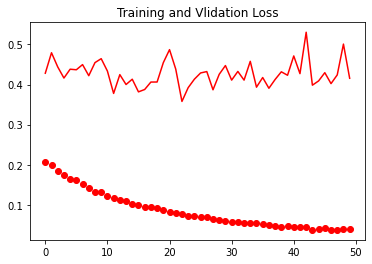

In [167]:
epochs=range(len(accuracy))
plt.plot(epochs,loss,'ro',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.title('Training and Vlidation Loss')

Text(0.5, 1.0, 'Training and Vlidation accuracy')

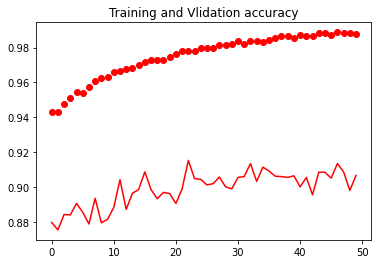

In [168]:
epochs=range(len(accuracy))
plt.plot(epochs,accuracy,'ro',label='Training accuracy')
plt.plot(epochs,val_accuracy,'r',label='Validation accuracy')
plt.title('Training and Vlidation accuracy')

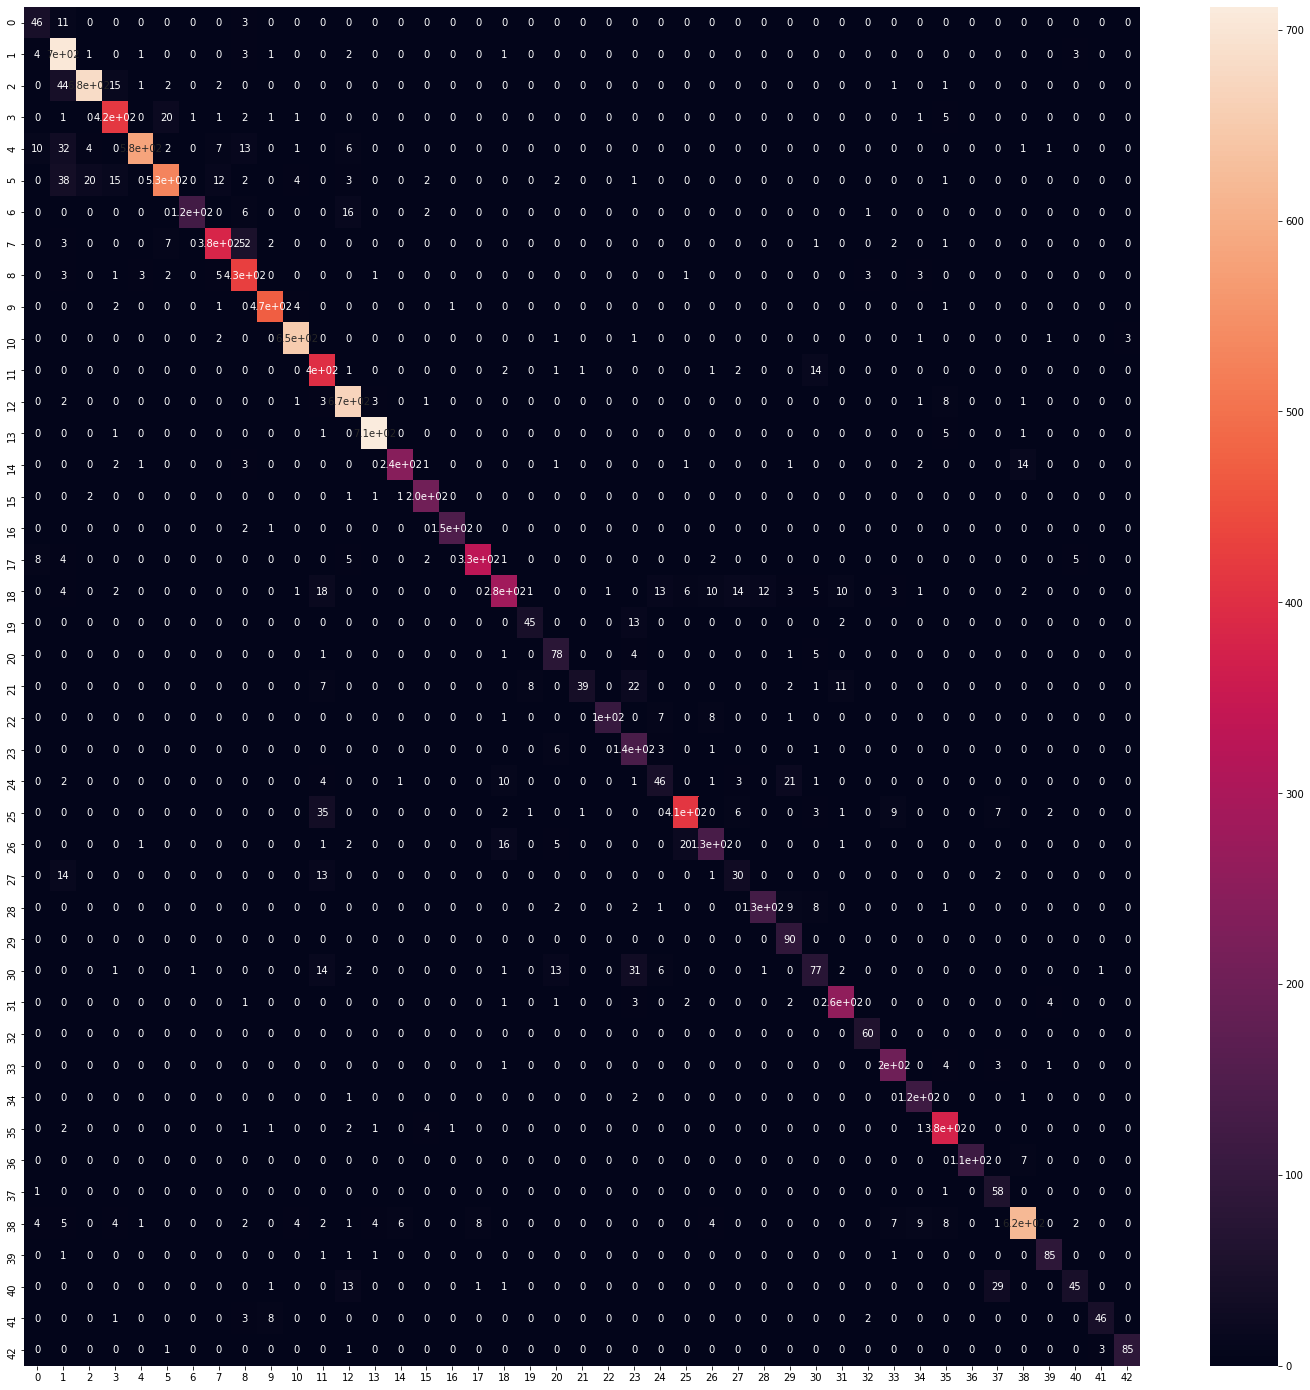

In [169]:
predicted_classes=CNN.predict_classes(X_test_gray_norm)
y_true=y_test

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,predicted_classes)
plt.figure(figsize=(25,25))
sns.heatmap(cm,annot=True)


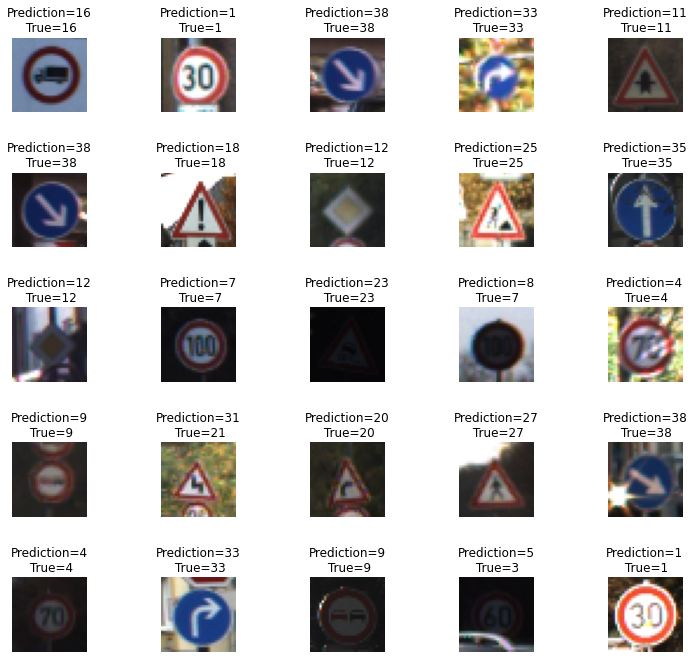

In [170]:
l=5
w=5

fig, axes=plt.subplots(l,w,figsize=(12,12))
axes=axes.ravel()

for i in np.arange(0,l*w):
  axes[i].imshow(X_test[i])
  axes[i].set_title('Prediction={}\n True={}'.format(predicted_classes[i],y_true[i]))
  axes[i].axis('off')

plt.subplots_adjust(wspace=1)

In [181]:
!pip install pytesseract


In [183]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 31 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,651 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [184]:
!sudo apt install libtesseract-dev 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libleptonica-dev
The following NEW packages will be installed:
  libleptonica-dev libtesseract-dev
0 upgraded, 2 newly installed, 0 to remove and 31 not upgraded.
Need to get 2,755 kB of archives.
After this operation, 13.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libleptonica-dev amd64 1.75.3-3 [1,308 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libtesseract-dev amd64 4.00~git2288-10f4998a-2 [1,447 kB]
Fetched 2,755 kB in 1s (2,867 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This fr

In [191]:
import pytesseract as tess
from PIL import Image

img=Image.open('image_1.png')
text=tess.image_to_string(img)
print(text)

lam curious about
area-filling text
rendering options


In [193]:
img=Image.open('image_2.png')
text=tess.image_to_string(img)
print(text)

The quick brown fox
jumped over the 5
lazy dogs!


In [194]:
img=Image.open('image_3.png')
text=tess.image_to_string(img)
print(text)

Hello World!


In [196]:
img=Image.open('image_4.png')
text=tess.image_to_string(img)
print(text)

the house is blue English
la maison est bleue French

la casa es azul Spanish
das Haus ist blau German
